# Exploitation des Données

### Installation

In [140]:
#%pip install pandas
#%pip install matplotlib
#%pip install seaborn
#%pip install scipy
#%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement mpl_toolkits (from versions: none)
ERROR: No matching distribution found for mpl_toolkits

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Importation


In [2]:
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols

### Chargement des données

In [50]:
df = pd.read_csv("data_.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [51]:
# Logarithme des charges
df['log_charges'] = np.log1p(df['charges'])
df['log_age'] = np.log(df['age']+1)
df['log_bmi'] = np.log(df['bmi']+1)
df['log_children'] = np.log(df['children']+1)
# Discrétisation de l'âge (par tranche)
bins_age = [0, 30, 45, 60, np.inf]
labels_age = ['Jeune', 'Mature', 'Âgé', 'Senior']
df['age_group'] = pd.cut(df['age'], bins=bins_age, labels=labels_age)

# Discrétisation du BMI
bins_bmi = [0, 18.5, 25, 30, np.inf]
labels_bmi = ['Maigre', 'Normal', 'Surpoids', 'Obèse']
df['bmi_category'] = pd.cut(df['bmi'], bins=bins_bmi, labels=labels_bmi)

#Création de nouvelles variables
#Ratios entre variables, par exemple charges par enfant ou BMI par tranche d'âge.
#Interactions entre variables.
# Ratios
df['charges_par_enfant'] = df['charges'] / (df['children'] + 1)  # éviter division par zéro

# Interaction entre BMI et charges
df['bmi_charges_'] = df['bmi'] * df['charges']

#Gestion des valeurs aberrantes (outliers)
#Suppression ou traitement des valeurs extrêmes dans les variables continues.
# Suppression des outliers dans charges
q1, q3 = df['charges'].quantile([0.25, 0.75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

#df = df[(df['charges'] >= lower_bound) & (df['charges'] <= upper_bound)]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   age                 1338 non-null   int64   
 1   sex                 1338 non-null   object  
 2   bmi                 1338 non-null   float64 
 3   children            1338 non-null   int64   
 4   smoker              1338 non-null   object  
 5   region              1338 non-null   object  
 6   charges             1338 non-null   float64 
 7   log_charges         1338 non-null   float64 
 8   log_age             1338 non-null   float64 
 9   log_bmi             1338 non-null   float64 
 10  log_children        1338 non-null   float64 
 11  age_group           1338 non-null   category
 12  bmi_category        1338 non-null   category
 13  charges_par_enfant  1338 non-null   float64 
 14  bmi_charges_        1338 non-null   float64 
dtypes: category(2), float64(8), int64(2), 

In [39]:
df.head()

,age,log_age,log_bmi,log_children,sex,bmi,children,smoker,region,age_group,bmi_category,charges
0,19,2.995732,3.363842,0.000000,female,27.900,0,yes,southwest,Jeune,Surpoids,16884.92400
1,18,2.944439,3.548755,0.693147,male,33.770,1,no,southeast,Jeune,Obèse,1725.55230
2,28,3.367296,3.526361,1.386294,male,33.000,3,no,southeast,Jeune,Obèse,4449.46200
3,33,3.526361,3.165686,0.000000,male,22.705,0,no,northwest,Mature,Normal,21984.47061
4,32,3.496508,3.397189,0.000000,male,28.880,0,no,northwest,Mature,Surpoids,3866.85520


In [21]:
df = df[["age", "sex", "bmi", "children", "smoker", "region", "log_charges", "age_group", "bmi_category", "charges_par_enfant", "bmi_charges_", "charges"]]

In [ ]:
df.to_csv("df_assurance.csv", index=False)

In [16]:
df = df[["age", "sex", "bmi", "children", "smoker", "region", "age_group", "bmi_category", "charges_par_enfant", "bmi_charges_", "charges"]]

In [ ]:
df.to_csv("df_assurance_plus_2.csv", index=False)

In [48]:
df = df[["age", "log_age","log_bmi","log_children","sex", "bmi", "children", "smoker", "region", "age_group", "bmi_category", "charges"]]

In [52]:
df = df[["log_age","log_bmi","log_children","sex", "smoker", "region", "age_group", "bmi_category", "charges"]]

In [53]:
df.to_csv("df_assurance_plus_5_with_outliers_sans_numeric.csv", index=False)

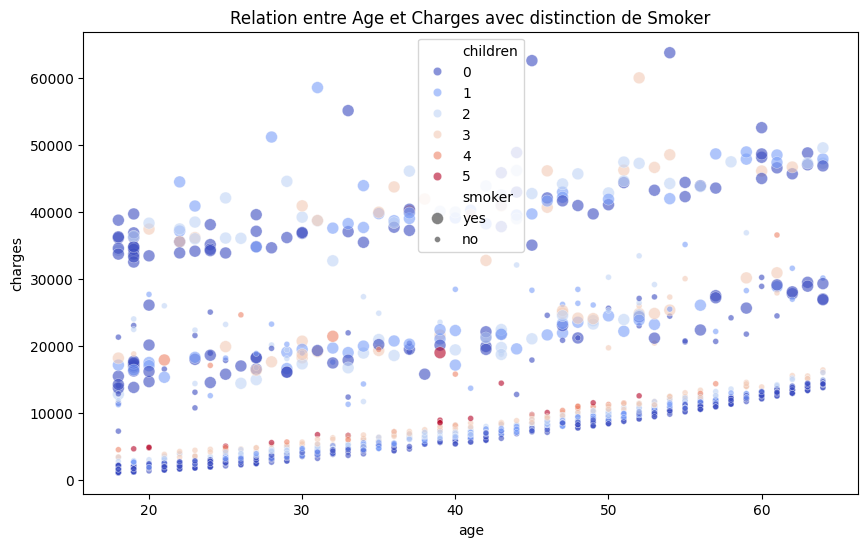

In [139]:
#plt.figure
#plt.scatter(df.iloc[:,6], df.iloc[:,0], alpha=0.6)
#plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='charges', hue='children', palette='coolwarm', size="smoker", alpha= 0.6)
#sns.lineplot(data=df, x='age', y='charges', hue='smoker', palette='coolwarm')
plt.title('Relation entre Age et Charges avec distinction de Smoker')
plt.show()

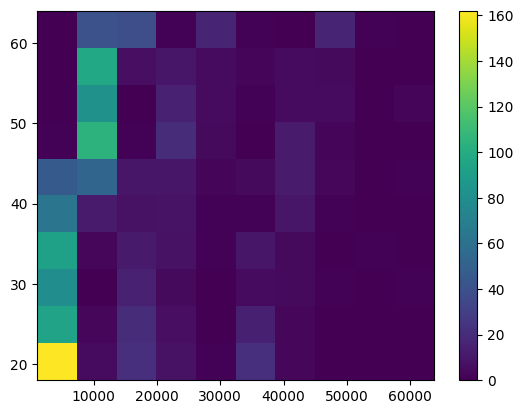

In [148]:
plt.figure
plt.hist2d(df.iloc[:,6], df.iloc[:,0])
plt.colorbar()
plt.show()

In [167]:
#dfi = df.groupby(['age']).mean()
print(df.head())
grouped = df.groupby("sex").mean()
print(grouped)
#statistiques_categorie = grouped["sex"].agg(["mean", "std"]).reset_index()
statistiques_categorie.describe()
#print(dfi)
#plt.figure
#plt.hist(df["age"])
#plt.show()


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


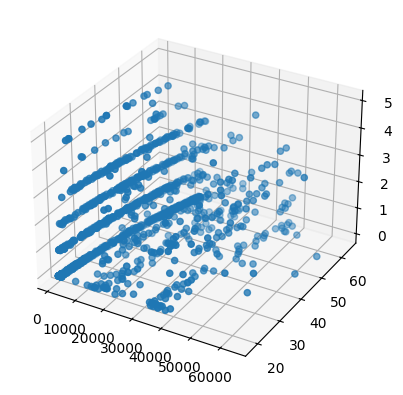

In [146]:
from mpl_toolkits.mplot3d import Axes3D
ax = plt.axes(projection='3d')
ax.scatter(df.iloc[:,6], df.iloc[:,0], df.iloc[:,3])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


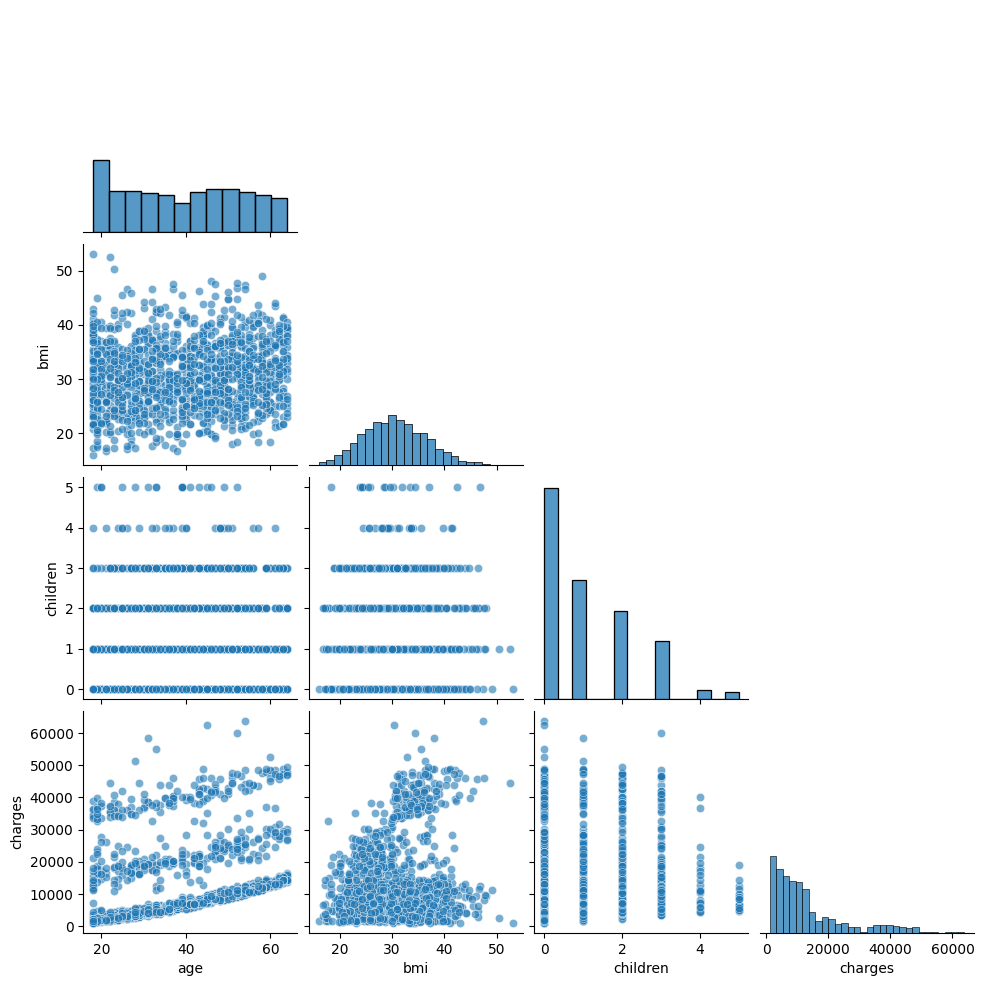

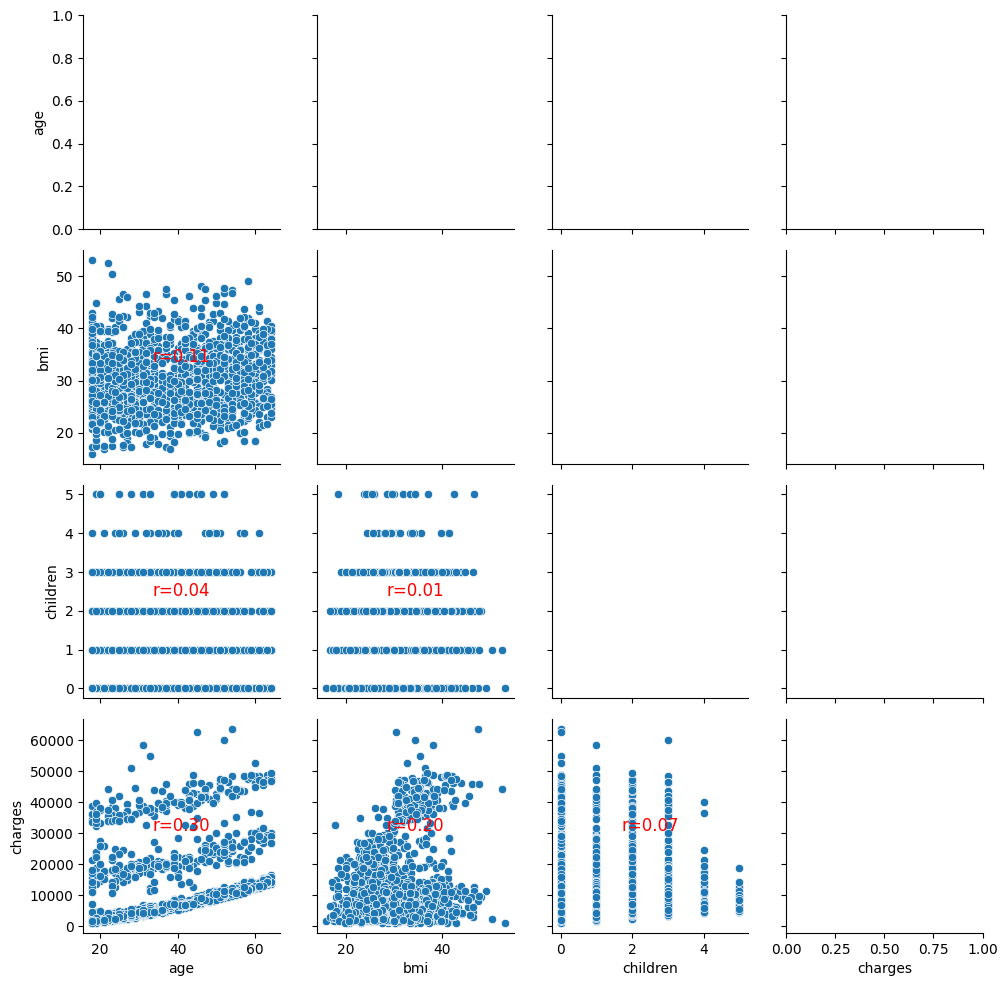

In [ ]:
def annotate_corr(x, y, **kwargs):
    r = np.corrcoef(x, y)[0, 1]
    ax = plt.gca()
    ax.annotate(f'r={r:.2f}', xy=(0.5, 0.5), xycoords=ax.transAxes,
                ha='center', va='center', fontsize=12, color='red')
    
#sns.pairplot(df,  hue='charges', palette='coolwarm')
#sns.pairplot(df, palette='coolwarm')
#df2 = df.tail()
#print()
sns.pairplot(df, corner=True, plot_kws={'alpha': 0.6})
g = sns.PairGrid(df)
g.map_lower(sns.scatterplot)
g.map_lower(annotate_corr)
plt.show()

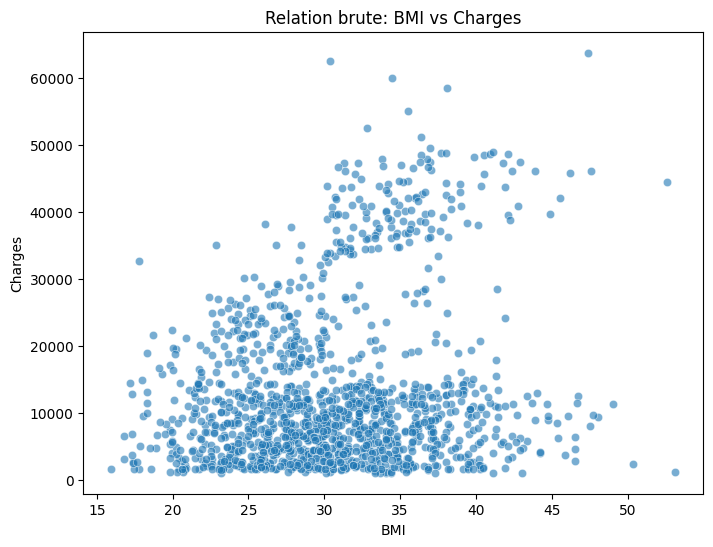

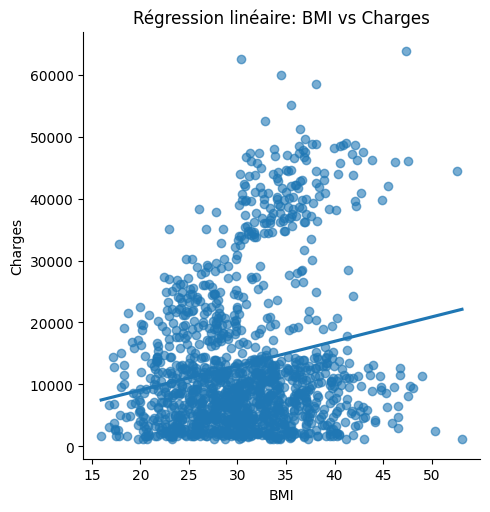

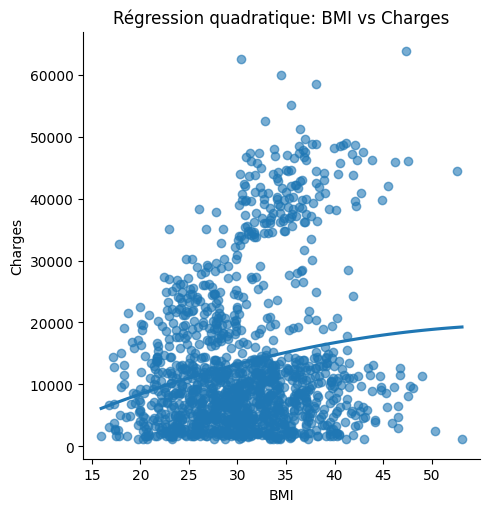

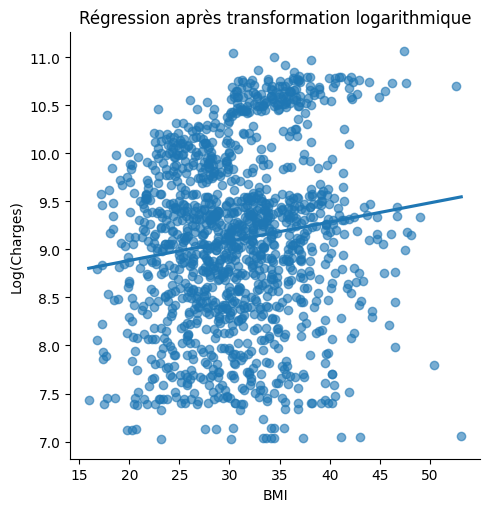

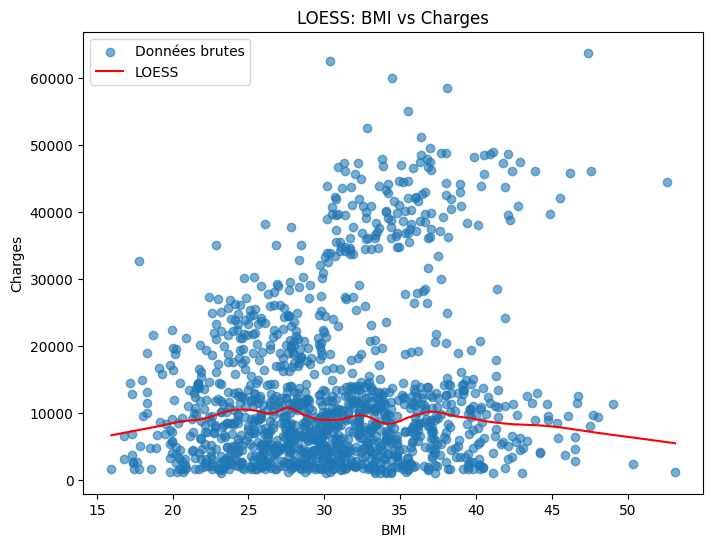

In [126]:
#plt.figure(figsize=(10, 6))
#sns.scatterplot(data=df, x='age', y='charges', hue='smoker', palette='coolwarm')
#sns.lineplot(data=df, x='age', y='charges', hue='smoker', palette='coolwarm')
#plt.title('Relation entre Age et Charges avec distinction de Smoker')
#plt.show()

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='bmi', y='charges', alpha=0.6)
plt.title("Relation brute: BMI vs Charges")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()

sns.lmplot(data=df, x='bmi', y='charges', ci=None, scatter_kws={'alpha':0.6})
plt.title("Régression linéaire: BMI vs Charges")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()

sns.lmplot(data=df, x='bmi', y='charges', order=2, ci=None, scatter_kws={'alpha':0.6})
plt.title("Régression quadratique: BMI vs Charges")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()

import numpy as np

# Transformation logarithmique
df['log_charges'] = np.log(df['charges'])

sns.lmplot(data=df, x='bmi', y='log_charges', ci=None, scatter_kws={'alpha':0.6})
plt.title("Régression après transformation logarithmique")
plt.xlabel("BMI")
plt.ylabel("Log(Charges)")
plt.show()

from statsmodels.nonparametric.smoothers_lowess import lowess

# Lissage LOESS
lowess_smoothed = lowess(df['charges'], df['bmi'], frac=0.2)

plt.figure(figsize=(8, 6))
plt.scatter(df['bmi'], df['charges'], alpha=0.6, label="Données brutes")
plt.plot(lowess_smoothed[:, 0], lowess_smoothed[:, 1], color='red', label="LOESS")
plt.title("LOESS: BMI vs Charges")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.legend()
plt.show()

In [95]:
def view_feature(data):
    sns.boxplot(data=data)
    sns.violinplot(data=data)
    plt.show()
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    # Bornes pour détecter les outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtrer les outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    print("Outliers détectés :", outliers)

In [96]:
def view_charge_feature(data):
    print("charges")
    sns.boxplot(x=data)
    sns.violinplot(x=data)
    plt.show()
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    # Bornes pour détecter les outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(lower_bound)
    print(upper_bound)
    # Filtrer les outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    print(outliers.describe())
    print("Outliers détectés :", outliers)

In [68]:
df3 = df[df["bmi"]>=45]
print(df3)

      age     sex    bmi  children smoker     region      charges   Z-Score
116    58    male  49.06         0     no  southeast  11381.32540  3.017861
286    46  female  48.07         2     no  northeast   9432.92530  2.855457
292    25    male  45.54         2    yes  southeast  42112.23560  2.440425
401    47    male  47.52         1     no  southeast   8083.91980  2.765233
438    52  female  46.75         5     no  southeast  12592.53450  2.638918
454    32    male  46.53         2     no  southeast   4686.38870  2.602829
543    54  female  47.41         0    yes  southeast  63770.42801  2.747188
547    54  female  46.70         2     no  southwest  11538.42100  2.630716
549    43  female  46.20         0    yes  southeast  45863.20500  2.548694
582    39    male  45.43         2     no  southeast   6356.27070  2.422380
660    37    male  46.53         3     no  southeast   6435.62370  2.602829
847    23    male  50.38         1     no  southeast   2438.05520  3.234400
860    37  f

<function matplotlib.pyplot.show(close=None, block=None)>

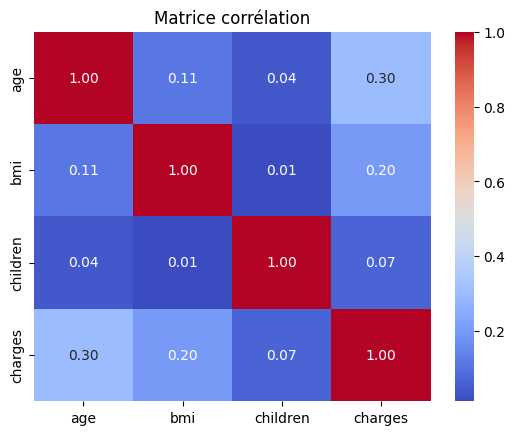

In [97]:
correlation = []
df1 = df[["age","bmi","children","charges"]]
df2 = df[["sex","smoker","region","charges"]]
correlation_matrix = df1.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice corrélation")
plt.show
#def calcul_correltion(data):
	#for i in range(0,data.shape[1]-1):
	#	corre = np.mean(data[:,i])
	#	std = np.std(data[:,i])
	#	mu_list.append(mu)
	#	std_list.append(std)
	#	data[:,i] = ((data[:,i] - mu)/std)

Z-scores :       age     sex     bmi  children smoker     region      charges   Z-Score
0      19  female  27.900         0    yes  southwest  16884.92400 -0.453320
1      18    male  33.770         1     no  southeast   1725.55230  0.509621
2      28    male  33.000         3     no  southeast   4449.46200  0.383307
3      33    male  22.705         0     no  northwest  21984.47061 -1.305531
4      32    male  28.880         0     no  northwest   3866.85520 -0.292556
...   ...     ...     ...       ...    ...        ...          ...       ...
1333   50    male  30.970         3     no  northwest  10600.54830  0.050297
1334   18  female  31.920         0     no  northeast   2205.98080  0.206139
1335   18  female  36.850         0     no  southeast   1629.83350  1.014878
1336   21  female  25.800         0     no  southwest   2007.94500 -0.797813
1337   61  female  29.070         0    yes  northwest  29141.36030 -0.261388

[1338 rows x 8 columns]
Valeurs extrêmes (Z-score) :       age  

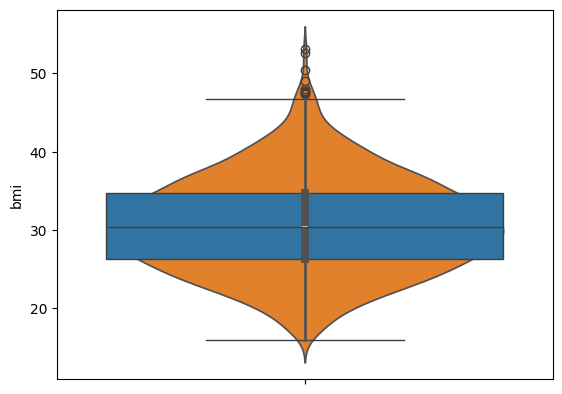

Outliers détectés : 116     49.06
286     48.07
401     47.52
543     47.41
847     50.38
860     47.60
1047    52.58
1088    47.74
1317    53.13
Name: bmi, dtype: float64


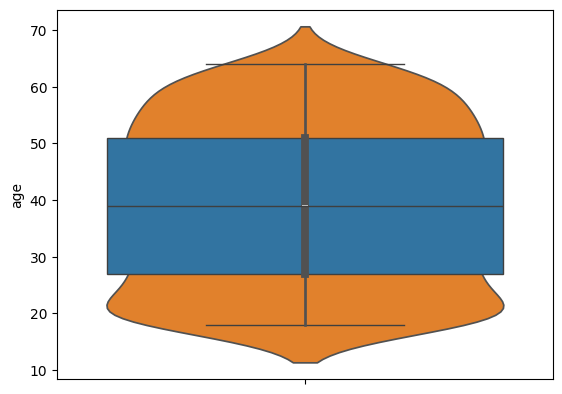

Outliers détectés : Series([], Name: age, dtype: int64)


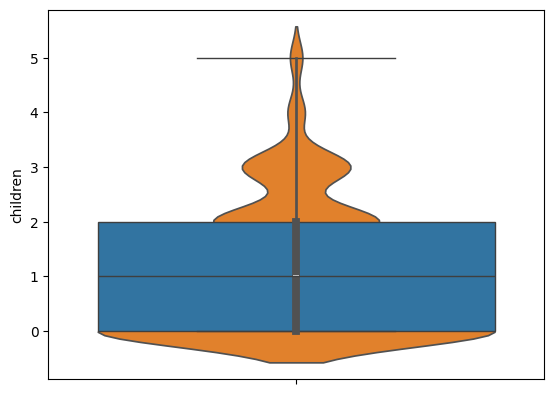

Outliers détectés : Series([], Name: children, dtype: int64)
charges


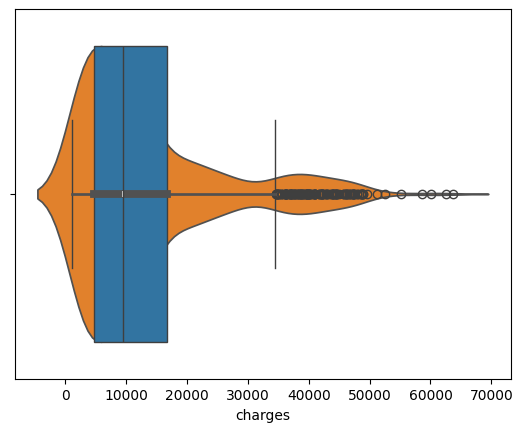

-13109.1508975
34489.350562499996
count      139.000000
mean     42103.947206
std       5582.168107
min      34617.840650
25%      37786.149950
50%      40974.164900
75%      45786.706425
max      63770.428010
Name: charges, dtype: float64
Outliers détectés : 14      39611.75770
19      36837.46700
23      37701.87680
29      38711.00000
30      35585.57600
           ...     
1300    62592.87309
1301    46718.16325
1303    37829.72420
1313    36397.57600
1323    43896.37630
Name: charges, Length: 139, dtype: float64


In [98]:
"""mu_list = []
std_list = []

def detection_outliers(data):
	for i in range(0,data.shape[1]-1):
		mu = np.mean(data[:,i])
		std = np.std(data[:,i])
		mu_list.append(mu)
		std_list.append(std)
		data[:,i] = ((data[:,i] - mu)/std)"""

from scipy.stats import zscore
# Calcul du Z-score
df['Z-Score'] = zscore(df['bmi'])

# Détection des outliers
outliers_zscore = df[(df['Z-Score'] > 3) | (df['Z-Score'] < -3)]

# Affichage des résultats
print("Z-scores :", df)
print("Valeurs extrêmes (Z-score) :", outliers_zscore)

view_feature(df['bmi'])
#view_feature(df['Z-Score'])
view_feature(df['age'])
view_feature(df['children'])
view_charge_feature(df['charges'])



#sns.boxplot(x=df['bmi'])
#plt.title("Détection des outliers avec un Boxplot")
#plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sex      1338 non-null   object 
 1   smoker   1338 non-null   object 
 2   region   1338 non-null   object 
 3   charges  1338 non-null   float64
dtypes: float64(1), object(3)
memory usage: 41.9+ KB


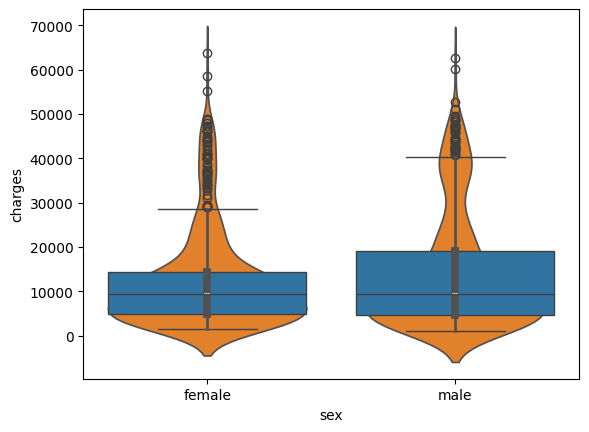

Test ANOVA - F-statistique : 4.40, p-value : 0.036
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2  meandiff p-adj   lower    upper   reject
-------------------------------------------------------
female   male 1387.1723 0.0361 89.8123 2684.5324   True
-------------------------------------------------------


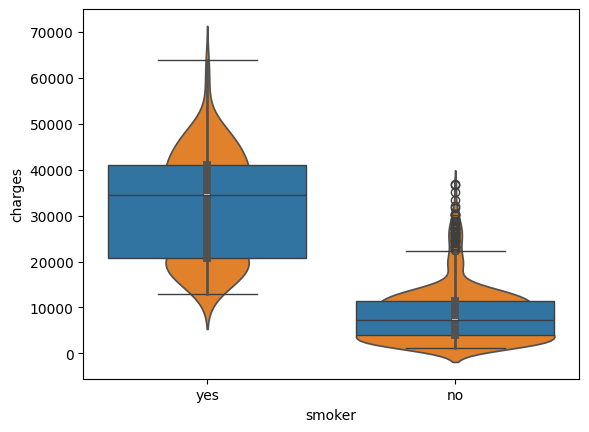

Test ANOVA - F-statistique : 2177.61, p-value : 0.000


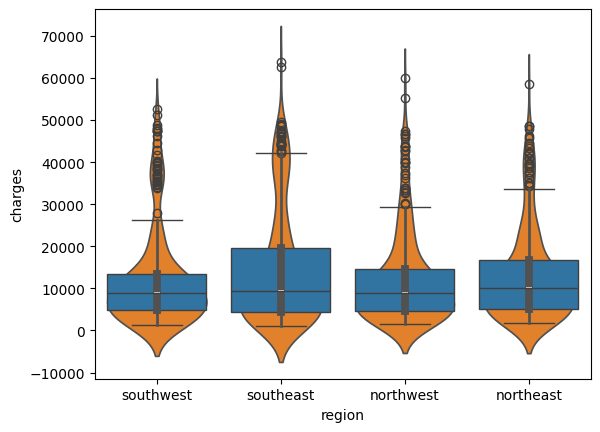

Test ANOVA - F-statistique : 2.97, p-value : 0.031


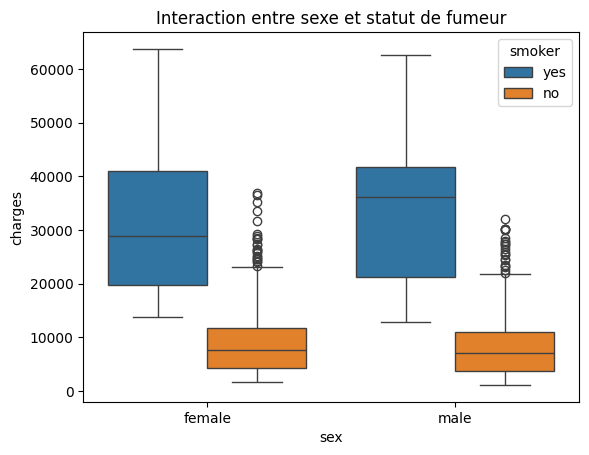

                        sum_sq      df            F         PR(>F)
C(sex)            1.421312e+06     1.0     0.025601   8.729026e-01
C(smoker)         1.208777e+11     1.0  2177.284440  1.247285e-282
C(sex):C(smoker)  4.923397e+08     1.0     8.868165   2.954255e-03
Residual          7.406056e+10  1334.0          NaN            NaN


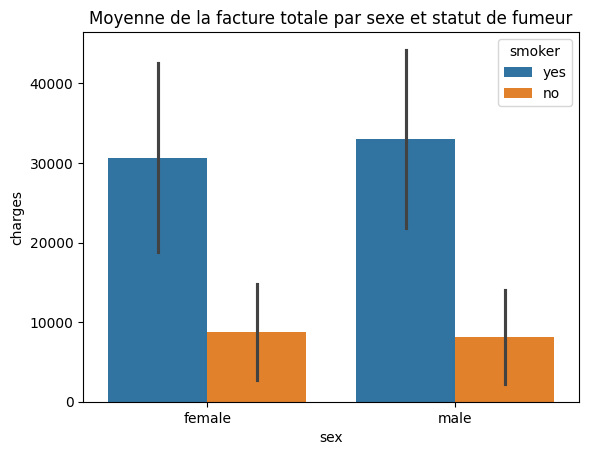

In [112]:

df2.info()
sns.boxplot(x="sex", y="charges", data=df2)
sns.violinplot(x="sex", y="charges",data=df2)
plt.show()

anova_result = stats.f_oneway(df2[df2['sex'] == 'female']['charges'],
                              df2[df2['sex'] == 'male']['charges'])

print(f"Test ANOVA - F-statistique : {anova_result.statistic:.2f}, p-value : {anova_result.pvalue:.3f}")

tukey = pairwise_tukeyhsd(endog=df2['charges'], groups=df2['sex'], alpha=0.05)
print(tukey)


sns.boxplot(x="smoker", y="charges", data=df2)
sns.violinplot(x="smoker", y="charges",data=df2)
plt.show()


anova_result2 = stats.f_oneway(df2[df2['smoker'] == 'no']['charges'],
                              df2[df2['smoker'] == 'yes']['charges'])

print(f"Test ANOVA - F-statistique : {anova_result2.statistic:.2f}, p-value : {anova_result2.pvalue:.3f}")

sns.boxplot(x="region", y="charges", data=df2)
sns.violinplot(x="region", y="charges",data=df2)
plt.show()

anova_result3 = stats.f_oneway(df2[df2['region'] == 'southwest']['charges'],
                              df2[df2['region'] == 'southeast']['charges'],
                              df2[df2['region'] == 'northwest']['charges'],
                              df2[df2['region'] == 'northeast']['charges']
                              )

print(f"Test ANOVA - F-statistique : {anova_result3.statistic:.2f}, p-value : {anova_result3.pvalue:.3f}")


sns.boxplot(x='sex', y='charges', hue='smoker', data=df2)
plt.title("Interaction entre sexe et statut de fumeur")
plt.show()

model = ols('charges ~ C(sex) + C(smoker) + C(sex):C(smoker)', data=df2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

sns.barplot(x='sex', y='charges', hue='smoker', data=df2, errorbar='sd')
plt.title("Moyenne de la facture totale par sexe et statut de fumeur")
plt.show()

### Exploitation des données

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [43]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [28]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


- inspection des colonnes

In [7]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

## Nettoyage des données

In [136]:
#df2["categorie_abbr"] = df2["categorie"].apply(lambda x: x[:3].upper())


- gestion des doublons

In [29]:
df.duplicated().sum()
#index = liste.index(True)
#print(index)

np.int64(1)

In [34]:
# Afficher uniquement les lignes dupliquées
duplicates_rows = df[df.duplicated()]

print(duplicates_rows)




Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []


In [33]:
df.drop_duplicates(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


- détection des valeurs manquantes

In [21]:
df.notna().sum()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

In [20]:
#missing_data = df[df['Column'].isna()]
df.isna().sum()
#df2.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

- nettoyage des entêtes

In [24]:
df.dropna()
#df2

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


- nettoyage des données de la colonne "prix"

In [140]:
#df2["prix"] = df2["prix"].str.split('€').str[0]

- conversion de type

In [141]:
#df2["prix"] = df2["prix"].astype(float)

- test du type

In [44]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

- test du tri

In [48]:
df.sort_values(by="children", ascending=True).tail(20)
df2 = df[df["children"]>=5]
print(df2)

      age     sex     bmi  children smoker     region      charges
32     19  female  28.600         5     no  southwest   4687.79700
71     31    male  28.500         5     no  northeast   6799.45800
166    20  female  37.000         5     no  southwest   4830.63000
413    25    male  23.900         5     no  southwest   5080.09600
425    45    male  24.310         5     no  southeast   9788.86590
438    52  female  46.750         5     no  southeast  12592.53450
568    49  female  31.900         5     no  southwest  11552.90400
640    33    male  42.400         5     no  southwest   6666.24300
877    33    male  33.440         5     no  southeast   6653.78860
932    46    male  25.800         5     no  southwest  10096.97000
937    39  female  24.225         5     no  northwest   8965.79575
969    39  female  34.320         5     no  southeast   8596.82780
984    20    male  30.115         5     no  northeast   4915.05985
1085   39  female  18.300         5    yes  southwest  19023.2

## Generation des données .csv après traitement _

In [144]:
#df.to_csv("resultats_categorie.csv", index=False)
#df2.to_csv("resultats_produits.csv", index=False)